# Load supported SSP templates

This notebook shows how to load and use the supported SSP templates. Currently we have support for custom build SSP templates stored in hdf5 format for which we provide a template based on Bruzual&Charlot2003 models. Additionally we support all SSP templates that the [pyPipe3D](http://ifs.astroscu.unam.mx/pyPipe3D/) project uses. Those templates come in astronomy friendly fits file format.

In [1]:
from rubix.spectra.ssp.templates import BruzualCharlot2003

BruzualCharlot2003

2024-07-16 11:48:20,669 - rubix - INFO - 
   ___  __  _____  _____  __
  / _ \/ / / / _ )/  _/ |/_/
 / , _/ /_/ / _  |/ /_>  <  
/_/|_|\____/____/___/_/|_|  
                            

2024-07-16 11:48:20,671 - rubix - INFO - Rubix version: 0.0.post66+g42d5801.d20240712
2024-07-16 11:48:20,671 - rubix - WARNING - python-fsps is not installed. Please install it to use this function. Install using pip install fsps and check the installation page: https://dfm.io/python-fsps/current/installation/ for more details. Especially, make sure to set all necessary environment variables.


HDF5SSPGrid(age=Array([ 0.       ,  5.100002 ,  5.1500006,  5.1999993,  5.25     ,
        5.3000016,  5.350002 ,  5.4000006,  5.4500012,  5.500002 ,
        5.550002 ,  5.600002 ,  5.6500025,  5.700002 ,  5.750002 ,
        5.8000026,  5.850003 ,  5.900003 ,  5.950003 ,  6.       ,
        6.0200005,  6.040001 ,  6.0599985,  6.0799985,  6.100002 ,
        6.120001 ,  6.1399984,  6.16     ,  6.18     ,  6.1999993,
        6.2200007,  6.24     ,  6.2599998,  6.2799997,  6.2999997,
        6.3199987,  6.3399997,  6.3600006,  6.3799996,  6.3999987,
        6.4200006,  6.44     ,  6.4599996,  6.4799995,  6.499999 ,
        6.52     ,  6.539999 ,  6.56     ,  6.5799994,  6.6      ,
        6.6199994,  6.6399994,  6.66     ,  6.679999 ,  6.699999 ,
        6.72     ,  6.7399993,  6.7599993,  6.7799997,  6.799999 ,
        6.819999 ,  6.839999 ,  6.8599997,  6.879999 ,  6.899999 ,
        6.919999 ,  6.939999 ,  6.959999 ,  6.9799986,  6.999999 ,
        7.0200005,  7.040001 ,  7.0599985,  7.

In [2]:
print(BruzualCharlot2003.age)

[ 0.         5.100002   5.1500006  5.1999993  5.25       5.3000016
  5.350002   5.4000006  5.4500012  5.500002   5.550002   5.600002
  5.6500025  5.700002   5.750002   5.8000026  5.850003   5.900003
  5.950003   6.         6.0200005  6.040001   6.0599985  6.0799985
  6.100002   6.120001   6.1399984  6.16       6.18       6.1999993
  6.2200007  6.24       6.2599998  6.2799997  6.2999997  6.3199987
  6.3399997  6.3600006  6.3799996  6.3999987  6.4200006  6.44
  6.4599996  6.4799995  6.499999   6.52       6.539999   6.56
  6.5799994  6.6        6.6199994  6.6399994  6.66       6.679999
  6.699999   6.72       6.7399993  6.7599993  6.7799997  6.799999
  6.819999   6.839999   6.8599997  6.879999   6.899999   6.919999
  6.939999   6.959999   6.9799986  6.999999   7.0200005  7.040001
  7.0599985  7.0799985  7.099998   7.119998   7.1399984  7.16
  7.18       7.1999993  7.2199984  7.24       7.2599998  7.2799997
  7.2999997  7.3199987  7.3399997  7.3599987  7.3799996  7.3999987
  7.4199986  7.4

## Load SSP template via custom config

This shows how to use a custom configuration to load an SSP template that is stored under some file location on your disk.

In [3]:
config = {
        "name": "Bruzual & Charlot (2003)",
        "format": "HDF5",
        "source": "https://www.bruzual.org/bc03/",
        "file_name": "BC03lr.h5",
        "fields": {
            "age": {
                "name": "age",
                "units": "Gyr",
                "in_log": False
            },
            "metallicity": {
                "name": "metallicity",
                "units": "",
                "in_log": False
            },
            "wavelength": {
                "name": "wavelength",
                "units": "Angstrom",
                "in_log": False
            },
            "flux": {
                "name": "flux",
                "units": "Lsun/Angstrom",
                "in_log": False
            }
        }
    }


In [4]:
from rubix.spectra.ssp.grid import HDF5SSPGrid
ssp = HDF5SSPGrid.from_file(config, file_location="../rubix/spectra/ssp/templates")
ssp

HDF5SSPGrid(age=Array([ 0.       ,  5.100002 ,  5.1500006,  5.1999993,  5.25     ,
        5.3000016,  5.350002 ,  5.4000006,  5.4500012,  5.500002 ,
        5.550002 ,  5.600002 ,  5.6500025,  5.700002 ,  5.750002 ,
        5.8000026,  5.850003 ,  5.900003 ,  5.950003 ,  6.       ,
        6.0200005,  6.040001 ,  6.0599985,  6.0799985,  6.100002 ,
        6.120001 ,  6.1399984,  6.16     ,  6.18     ,  6.1999993,
        6.2200007,  6.24     ,  6.2599998,  6.2799997,  6.2999997,
        6.3199987,  6.3399997,  6.3600006,  6.3799996,  6.3999987,
        6.4200006,  6.44     ,  6.4599996,  6.4799995,  6.499999 ,
        6.52     ,  6.539999 ,  6.56     ,  6.5799994,  6.6      ,
        6.6199994,  6.6399994,  6.66     ,  6.679999 ,  6.699999 ,
        6.72     ,  6.7399993,  6.7599993,  6.7799997,  6.799999 ,
        6.819999 ,  6.839999 ,  6.8599997,  6.879999 ,  6.899999 ,
        6.919999 ,  6.939999 ,  6.959999 ,  6.9799986,  6.999999 ,
        7.0200005,  7.040001 ,  7.0599985,  7.

In [5]:
ssp.age.shape

(221,)

In [6]:
ssp.metallicity.shape

(6,)

In [7]:
ssp.wavelength.shape

(842,)

In [8]:
ssp.flux.shape

(6, 221, 842)

# Let's plot some example spectra

In [9]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Flux [Lsun/Angstrom]')

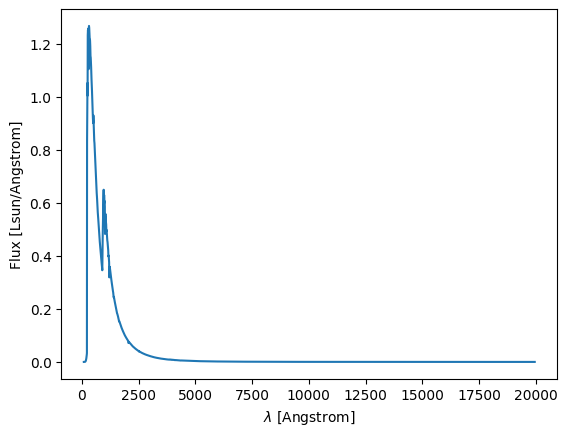

In [10]:
plt.plot(ssp.wavelength,ssp.flux[0][0])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")

Text(0, 0.5, 'Flux [Lsun/Angstrom]')

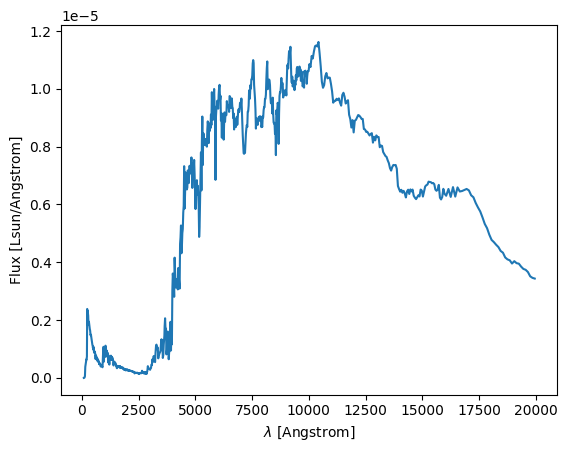

In [11]:
plt.plot(ssp.wavelength,ssp.flux[-1][-1])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")

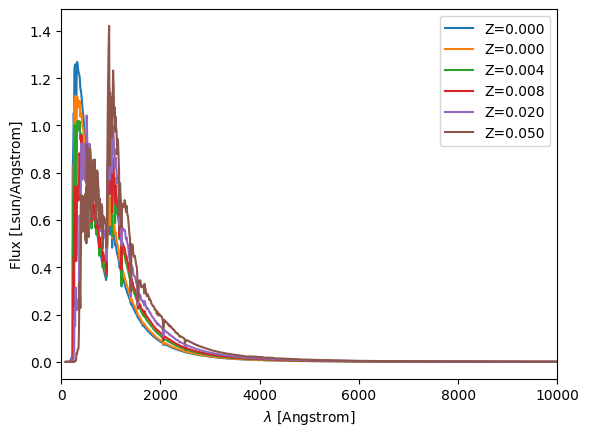

In [12]:
for i in range(len(ssp.metallicity)):
    plt.plot(ssp.wavelength,ssp.flux[i][0], label=r'Z=%0.3f'%ssp.metallicity[i])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(0,10000)
plt.legend()

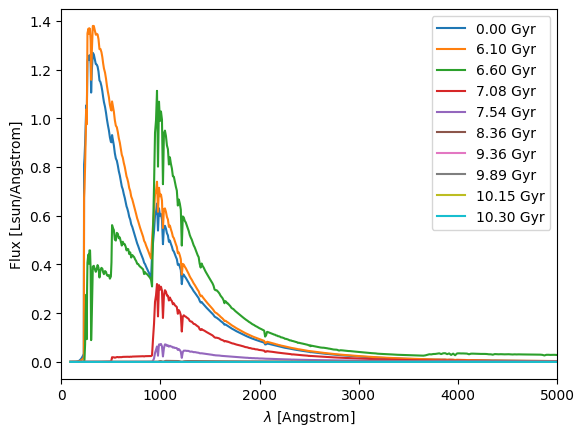

In [13]:
ages = np.linspace(0,len(ssp.age),10)
for age in ages:
    plt.plot(ssp.wavelength,ssp.flux[0][int(age)], label='%.2f %s'%(ssp.age[int(age)], config["fields"]["age"]["units"]))
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(0,5000)
plt.legend()

## Automatic download supported SSP template

Rubix supports automatic download of a supported SSP template from a specified url in case the template can't be found on disk under the file_location specified.

In [ ]:
config = {
        "name": "Mastar Charlot & Bruzual (2019)",
        "format": "pyPipe3D",
        "source": "http://ifs.astroscu.unam.mx/pyPipe3D/templates/",
        "file_name": "MaStar_CB19.slog_1_5.fits.gz",
        "fields": {
            "age": {
                "name": "age",
                "units": "Gyr",
                "in_log": False
            },
            "metallicity": {
                "name": "metallicity",
                "units": "",
                "in_log": False
            },
            "wavelength": {
                "name": "wavelength",
                "units": "Angstrom",
                "in_log": False
            },
            "flux": {
                "name": "flux",
                "units": "Lsun/Angstrom",
                "in_log": False
            }
        }
    }


In [ ]:
from rubix.spectra.ssp.grid import pyPipe3DSSPGrid
ssp = pyPipe3DSSPGrid.from_file(config, file_location="../rubix/spectra/ssp/templates")
ssp

In [ ]:
ssp.age.shape

In [ ]:
ssp.metallicity.shape

In [ ]:
ssp.wavelength.shape

In [ ]:
ssp.flux.shape

## Lets plot some example spectra

Example for Mastar templates

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.plot(ssp.wavelength,ssp.flux[0][0])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")

In [ ]:
plt.plot(ssp.wavelength,ssp.flux[-1][-1])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")

In [ ]:
for i in range(len(ssp.metallicity)):
    plt.plot(ssp.wavelength,ssp.flux[i][0], label=r'Z=%0.3f'%ssp.metallicity[i])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,10000)
plt.legend()

In [ ]:
ages = np.linspace(0,len(ssp.age),10)
for age in ages:
    plt.plot(ssp.wavelength,ssp.flux[0][int(age)], label='%.2f %s'%(ssp.age[int(age)], config["fields"]["age"]["units"]))
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,5000)
plt.legend()